In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from collections import defaultdict
from datetime import datetime
import h5py
import matplotlib.pyplot as plt
from neural_analysis.matIO import loadmat
import numpy as np
import os
import pandas as pd
from scipy.signal import butter, filtfilt, freqz
from scipy import stats
import sys
import time
from tqdm.auto import tqdm

sys.path.append('../..')
from ld_utils import compute_eigs, get_data_sigma_norms
from up_down import get_up_down
from utils import get_binary_stimuli, get_sample_interval, load, save, to_string

# Load Session Info

In [62]:
filename = r'/home/adameisen/millerdata/common/datasets/anesthesia/mat/propofolPuffTone/Mary-Anesthesia-20160809-01.mat'
electrode_info, lfp_schema, session_info, trial_info, unit_info = loadmat(filename, variables=['electrodeInfo', 'lfpSchema', 'sessionInfo', 'trialInfo', 'unitInfo'], verbose=False)
dt = lfp_schema['smpInterval'][0]
# T = lfp.shape[0]

f = h5py.File(filename, 'r')

# Load Results

In [6]:
data_dir = "/home/adameisen/Documents/MIT/code/ChaoticConsciousness/__data__/VAR_poster_presentation/full_vlPFC"
datafile = os.path.join(data_dir, "results_window_2.5_stride_2.5_PCA_dim_-1")
results = load(datafile)

In [72]:
bin_nums = 20
bins = [(results['eigs'].max() - results['eigs'].min())*i/bin_nums + results['eigs'].min() for i in range(bin_nums + 1 )]
criticality_prob_dist = np.zeros((results['eigs'].shape[0], bin_nums))
for t in range(results['eigs'].shape[0]):
    criticality_prob_dist[t] = np.histogram(results['eigs'][t], bins=bins)[0]

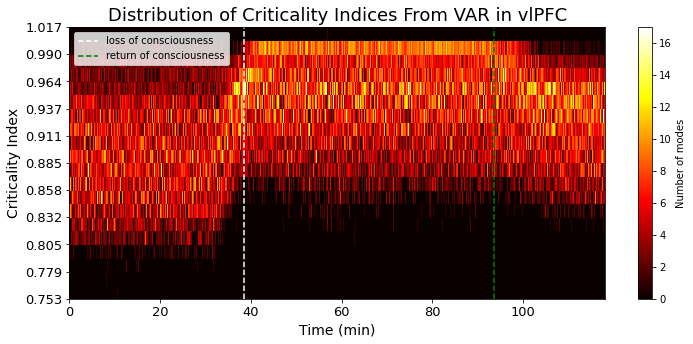

In [73]:
stride = 2.5
plt.figure(figsize=(12, 5))
plt.pcolormesh(criticality_prob_dist.T, cmap='hot')
start_times = np.arange(results['eigs'].shape[0])*stride/60
xticks = plt.xticks()
plt.xticks([int(i*60/stride) for i in np.arange(0, 120, 20)], np.arange(0, 120, 20))
plt.yticks(np.arange(0, 21, 2), [f"{b:.3f}" for b in np.array(bins)[np.arange(0, 21, 2)]])
ax = plt.gca()
ax.tick_params(labelsize=13)
plt.xlabel("Time (min)", fontsize=14)
plt.ylabel("Criticality Index", fontsize=14)
plt.title("Distribution of Criticality Indices From VAR in vlPFC", fontsize=18)
plt.axvline(session_info['eyesClose'][-1]/2.5 if isinstance(session_info['eyesClose'], np.ndarray) else session_info['eyesClose']/60, linestyle='--', c='white', label="loss of consciousness")
plt.axvline(session_info['eyesOpen'][-1]/2.5 if isinstance(session_info['eyesOpen'], np.ndarray) else session_info['eyesOpen']/60, linestyle='--', c='green', label="return of consciousness")
plt.legend()
plt.colorbar(label="Number of modes")
plt.show()

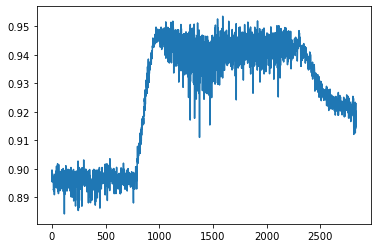

In [9]:
plt.plot(results['eigs'].mean(axis=1))

# $x_t = Ax_{t -1} + \eta_t$

Formal solution to dynamics is

# $x_n = A^nx_0$

eigenvalue decomposition, get values, done

# $A = Q\Lambda Q^{-1}$
# $x_n = Q \Lambda^n Q^{-1} x_0$